In [1]:
%%time
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
dSlowNoNorm = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to floats...
q-values estimated...
ranks computed...
features normed...
floats converted to ints...
file ready!
file read...
strings converted to floats...
q-values estimated...
ranks computed...
file ready!
Wall time: 29.6 s


Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3685, length of negative training set: 28394
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3713, length of negative training set: 28394
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 3953, length of negative training set: 28396
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 254.7962057072679.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 4050, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 4116, length of negative training set: 28394
Optimal parameters are C

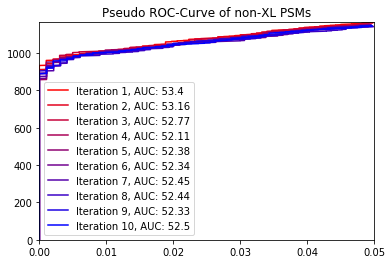

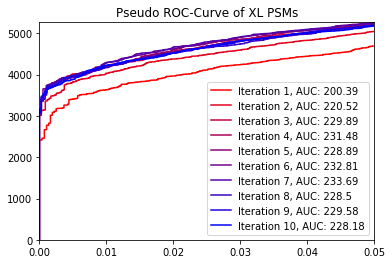

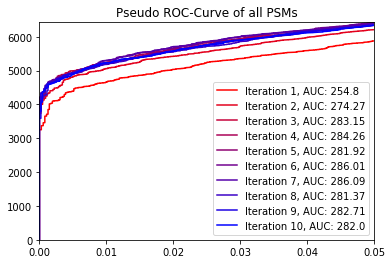

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3653, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3952, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 4344, length of negative training set: 28396
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 287.0845376046591.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 4387, length of negative training set: 28394
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 4688, length of negative training set: 28394
Optimal parameter

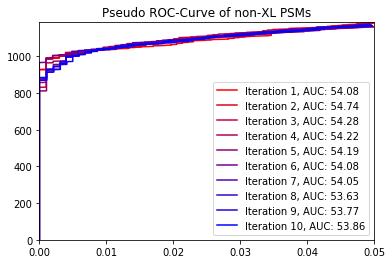

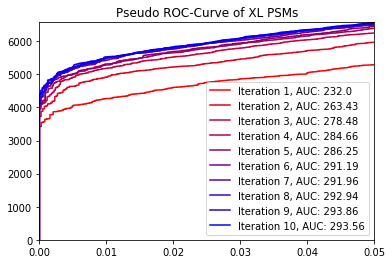

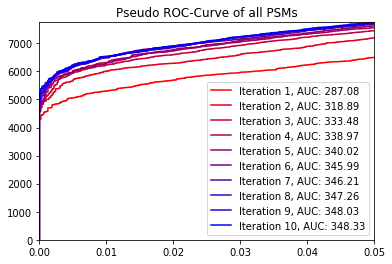

Wall time: 6min 37s


In [2]:
%%time

saveName = '../results/newest/noNorming_{}.png'

pn = percolator_experimental(dSlowNoNorm, idCol, features, plotSaveName = saveName)

saveName = '../results/newest/norming_{}.png'

p = percolator_experimental(dSlow, idCol, features, plotSaveName = saveName)